In [1]:
import pandas as pd
import mplfinance as mpf
from Investar import Analyzer




In [2]:
def read_krx_code():
    """KRX로부터 상장기업 목록 파일을 읽어와서 데이터프레임으로 반환"""
    url = 'http://kind.krx.co.kr/corpgeneral/corpList.do?method='\
        'download&searchType=13'
    krx = pd.read_html(url, header=0)[0]
    krx = krx[['종목코드', '회사명']]
    krx = krx.rename(columns={'종목코드': 'code', '회사명': 'company'})
    #krx.code = krx.code.map('{:06d}'.format)
    return krx







In [3]:
aa =read_krx_code()

In [4]:
company_name_list = aa.company

In [5]:
company_name_list[512]

'쎄트렉아이'

In [11]:
def price_trend(num):
    mk = Analyzer.MarketDB()
    df = mk.get_daily_price(company_name_list[num], '2022-06-01', '2022-12-31')
    df.index = pd.to_datetime(df.date)
    df = df[['open', 'high', 'low', 'close', 'volume']] 

    ema60 = df.close.ewm(span=60).mean()   # ① 종가의 12주 지수 이동평균
    ema130 = df.close.ewm(span=130).mean() # ② 종가의 26주 지수 이동평균
    macd = ema60 - ema130                  # ③ MACD선
    signal = macd.ewm(span=45).mean()      # ④ 신호선(MACD의 9주 지수 이동평균)
    macdhist = macd - signal               # ⑤ MACD 히스토그램

    apds = [mpf.make_addplot(ema130, color='c'),
        mpf.make_addplot(macdhist, type='bar', panel=1, color='m'),
        mpf.make_addplot(macd, panel=1, color='b'),
        mpf.make_addplot(signal, panel=1, color='g'),
        ]
    mc = mpf.make_marketcolors(up='r', down='b', inherit=True) 
    stl = mpf.make_mpf_style(marketcolors=mc) 
    mpf.plot(df, title=company_name_list[num], type='candle',
    addplot=apds, figsize=(9,7), panel_ratios=(1,1), style=stl)
    return macdhist

/Users/minsu/Library/Mobile Documents/com~apple~CloudDocs/data_code/finance/myPackage_m1/Investar/Analyzer.py:22: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  krx = pd.read_sql(sql, self.conn)
/Users/minsu/Library/Mobile Documents/com~apple~CloudDocs/data_code/finance/myPackage_m1/Investar/Analyzer.py:87: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(sql, self.conn)


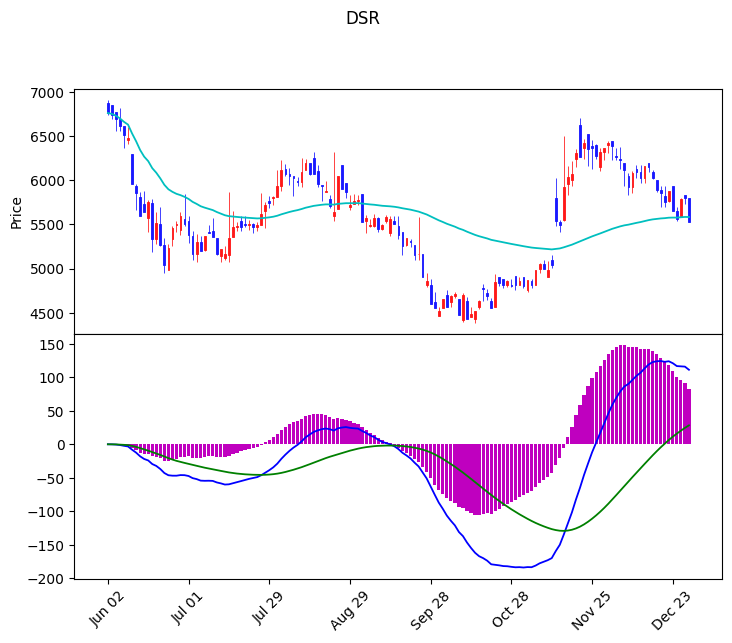

In [12]:
a = price_trend(1)

In [10]:
a

,open,high,low,close,volume
date,,,,,
2022-06-02,6870,6910,6740,6760,118901
2022-06-03,6850,6850,6690,6740,76656
2022-06-07,6770,6770,6560,6690,109945
2022-06-08,6690,6820,6560,6610,97637
2022-06-09,6610,6610,6360,6510,57265
...,...,...,...,...,...
2022-12-23,5930,5930,5650,5650,24080
2022-12-26,5650,5700,5540,5560,19576
2022-12-27,5580,5800,5580,5790,25672


In [10]:
def get_macd(num):
    mk = Analyzer.MarketDB()
    df = mk.get_daily_price(company_name_list[num], '2022-06-01', '2022-12-31')
    df.index = pd.to_datetime(df.date)
    df = df[['open', 'high', 'low', 'close', 'volume']] 

    ema60 = df.close.ewm(span=60).mean()   # ① 종가의 12주 지수 이동평균
    ema130 = df.close.ewm(span=130).mean() # ② 종가의 26주 지수 이동평균
    macd = ema60 - ema130                  # ③ MACD선
    signal = macd.ewm(span=45).mean()      # ④ 신호선(MACD의 9주 지수 이동평균)
    macdhist = macd - signal               # ⑤ MACD 히스토그램


    return macdhist

In [11]:
def get_macd(num):
    mk = Analyzer.MarketDB()
    df = mk.get_daily_price(company_name_list[num], '2022-06-01', '2022-12-31')
    df.index = pd.to_datetime(df.date)
    df = df[['open', 'high', 'low', 'close', 'volume']] 

    ema60 = df.close.ewm(span=60).mean()   # ① 종가의 12주 지수 이동평균
    ema130 = df.close.ewm(span=130).mean() # ② 종가의 26주 지수 이동평균
    macd = ema60 - ema130                  # ③ MACD선
    signal = macd.ewm(span=45).mean()      # ④ 신호선(MACD의 9주 지수 이동평균)
    macdhist = macd - signal               # ⑤ MACD 히스토그램


    return macdhist

In [12]:
len(company_name_list)

831

In [13]:
get_macd

<function __main__.get_macd(num)>

In [14]:
import warnings

In [15]:
warnings.filterwarnings('ignore')

In [16]:
macd_today = []



for i in range(len(company_name_list)):
    

    a = get_macd(i)
    macd_today.append(a);
        #print(i)
    

ValueError: Code(LX하우시스) doesn't exist.
ValueError: Code(보령) doesn't exist.
ValueError: Code(신풍) doesn't exist.
ValueError: Code(CJ 바이오사이언스) doesn't exist.
ValueError: Code(ES큐브) doesn't exist.
ValueError: Code(KH 전자) doesn't exist.
ValueError: Code(감성코퍼레이션) doesn't exist.
ValueError: Code(광무) doesn't exist.
ValueError: Code(넥스턴바이오) doesn't exist.
ValueError: Code(다보링크) doesn't exist.
ValueError: Code(모코엠시스) doesn't exist.
ValueError: Code(솔트웨어) doesn't exist.
ValueError: Code(아이윈) doesn't exist.
ValueError: Code(에스엘바이오닉스) doesn't exist.
ValueError: Code(엠피대산) doesn't exist.
ValueError: Code(이엔코퍼레이션) doesn't exist.
ValueError: Code(인지소프트) doesn't exist.
ValueError: Code(일승) doesn't exist.
ValueError: Code(초록뱀컴퍼니) doesn't exist.
ValueError: Code(커머스마이너) doesn't exist.
ValueError: Code(케일럼) doesn't exist.
ValueError: Code(티에스넥스젠) doesn't exist.
ValueError: Code(포커스에이치엔에스) doesn't exist.
ValueError: Code(하이딥) doesn't exist.
ValueError: Code(현대무벡스) doesn't exist.
ValueError: Code(타스컴) does

In [17]:
last_value = []

In [18]:
for i in range(len(company_name_list)):
    
    if len(macd_today[i]) == 0:
        last_value.append(-100)
    else:
        
        last_value.append(macd_today[i][-1])
    #print(i)



In [19]:
j2 = [i for i in j if (last_value[j] >= 0 and last_value[j] < 5) ]


NameError: name 'j' is not defined

In [20]:
j2 = [i for i in last_value if i >= 0 and i < 10 ]


In [21]:
bb= [i for i,x in enumerate(last_value) if x >= 0 and x < 10 ] # => [1, 3]


In [22]:
last_value

[1.379256395827781,
 82.88380695578417,
 -109.6720294217713,
 -45.184134031333315,
 -106.60456788133013,
 332.0061045766175,
 24.467921517275357,
 -5.429163813750375,
 -2268.6416619954125,
 16.656396345807252,
 -100,
 39.28692218051944,
 17.73960192125429,
 -1121.1662461886453,
 -178.7070827047953,
 -355.84534439834135,
 -298.9622994945694,
 112.39723295131654,
 -12.423810734203698,
 138.3596334453127,
 4169.598953543229,
 103.43657120685691,
 28.57735041202453,
 4.230627078598616,
 176.48356891976948,
 -431.0819202881652,
 -0.2868444642679151,
 1.6238824400825251,
 -20304.47822777606,
 96.04442004370947,
 23.09361381750739,
 10.93202252588162,
 -24.29199257640437,
 -409.2470663507622,
 232.76163741277145,
 1699.7132817560707,
 44.08474281385752,
 3.810668319273674,
 9.870651840115514,
 -100,
 -28.308917165000366,
 0.0,
 -230.9753737125552,
 0.989123452673283,
 45.583134577423365,
 1589.4414577252937,
 846.3004359777575,
 -2.317164024316142,
 37.214903128574974,
 4.4741598196512395,
 1

In [23]:
len(bb)

103

In [24]:
j2

[1.379256395827781,
 4.230627078598616,
 1.6238824400825251,
 3.810668319273674,
 9.870651840115514,
 0.0,
 0.989123452673283,
 4.4741598196512395,
 4.80687108827585,
 8.833764837452861,
 0.9421554812120831,
 1.269662861509783,
 0.09708285363464597,
 0.27772093968946987,
 9.738548919286021,
 0.0,
 1.0678282658829104,
 4.11465212864146,
 0.4270813984281858,
 0.0,
 0.1114250312946421,
 3.195590399821157,
 8.926161906659473,
 0.0,
 7.3876254718586125,
 0.18906596268584508,
 5.575682574761515,
 8.032680787155797,
 1.7615030497554471,
 0.0,
 7.9894890231999085,
 9.51885700869002,
 2.9680507365277293,
 9.360315501867078,
 4.9300099146578304,
 7.442211208543313,
 6.1834032835323,
 0.0,
 0.23778897948294286,
 0.0,
 2.992498863846862,
 4.817908288379165,
 5.5576946026737915,
 5.991503482599171,
 6.913035828204961,
 6.846184348989823,
 0.05239951201976645,
 7.797318933744679,
 0.8532953193774249,
 0.0,
 0.0,
 7.736643960846209,
 8.50406530477785,
 1.194453014446779,
 7.789989193036373,
 0.0,
 9.

In [25]:
last_value

[1.379256395827781,
 82.88380695578417,
 -109.6720294217713,
 -45.184134031333315,
 -106.60456788133013,
 332.0061045766175,
 24.467921517275357,
 -5.429163813750375,
 -2268.6416619954125,
 16.656396345807252,
 -100,
 39.28692218051944,
 17.73960192125429,
 -1121.1662461886453,
 -178.7070827047953,
 -355.84534439834135,
 -298.9622994945694,
 112.39723295131654,
 -12.423810734203698,
 138.3596334453127,
 4169.598953543229,
 103.43657120685691,
 28.57735041202453,
 4.230627078598616,
 176.48356891976948,
 -431.0819202881652,
 -0.2868444642679151,
 1.6238824400825251,
 -20304.47822777606,
 96.04442004370947,
 23.09361381750739,
 10.93202252588162,
 -24.29199257640437,
 -409.2470663507622,
 232.76163741277145,
 1699.7132817560707,
 44.08474281385752,
 3.810668319273674,
 9.870651840115514,
 -100,
 -28.308917165000366,
 0.0,
 -230.9753737125552,
 0.989123452673283,
 45.583134577423365,
 1589.4414577252937,
 846.3004359777575,
 -2.317164024316142,
 37.214903128574974,
 4.4741598196512395,
 1

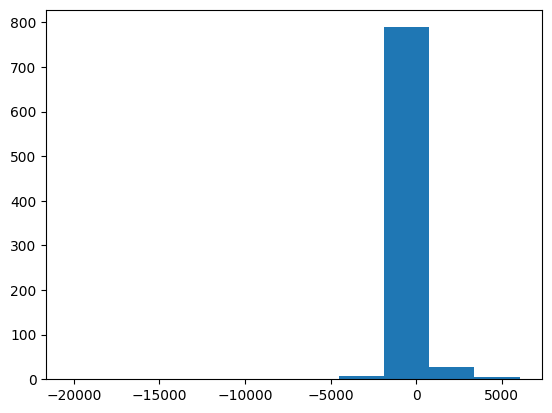

In [26]:
import matplotlib.pyplot as plt



plt.hist(last_value)

plt.show()

In [27]:
macd_today[i][-1]

0.19155630396362608

In [28]:
last_value[2]

-109.6720294217713

In [29]:
len(last_value)

831

In [30]:
def price_trend(num):
    mk = Analyzer.MarketDB()
    df = mk.get_daily_price(company_name_list[num], '2022-06-01', '2022-12-31')
    df.index = pd.to_datetime(df.date)
    df = df[['open', 'high', 'low', 'close', 'volume']] 

    ema60 = df.close.ewm(span=60).mean()   # ① 종가의 12주 지수 이동평균
    ema130 = df.close.ewm(span=130).mean() # ② 종가의 26주 지수 이동평균
    macd = ema60 - ema130                  # ③ MACD선
    signal = macd.ewm(span=45).mean()      # ④ 신호선(MACD의 9주 지수 이동평균)
    macdhist = macd - signal               # ⑤ MACD 히스토그램

    apds = [mpf.make_addplot(ema130, color='c'),
        mpf.make_addplot(macdhist, type='bar', panel=1, color='m'),
        mpf.make_addplot(macd, panel=1, color='b'),
        mpf.make_addplot(signal, panel=1, color='g'),
        ]
    mc = mpf.make_marketcolors(up='r', down='b', inherit=True) 
    stl = mpf.make_mpf_style(marketcolors=mc) 
    mpf.plot(df, title=company_name_list[num], type='candle',
    addplot=apds, figsize=(9,7), panel_ratios=(1,1), style=stl)
    return macdhist

In [31]:
len(bb)

103

In [36]:
len(bb)

103

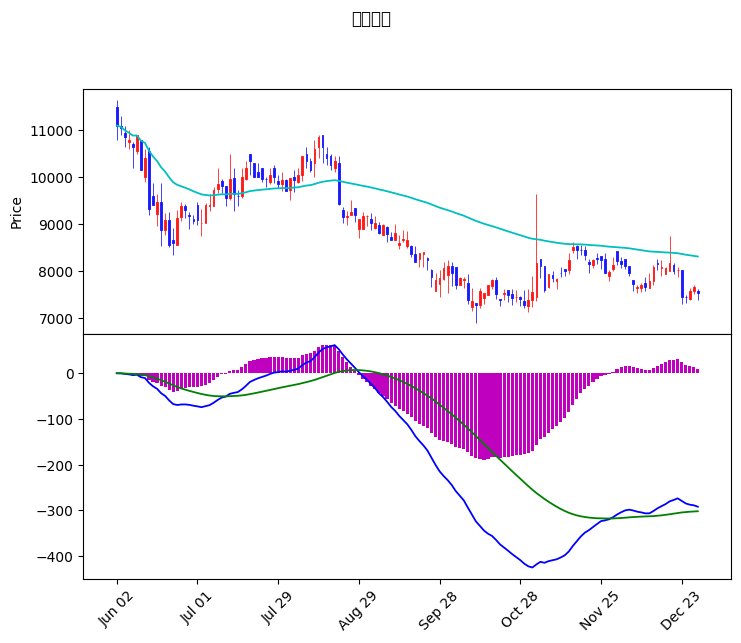

822


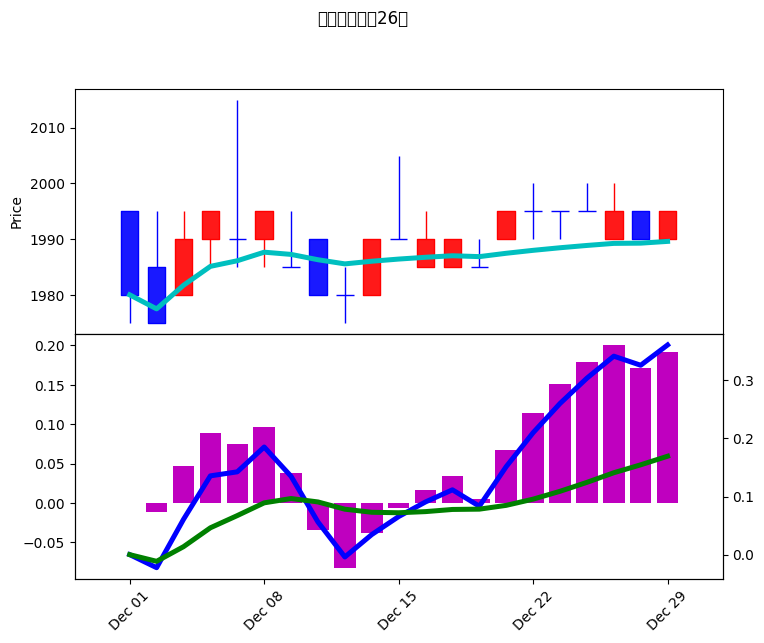

830


In [40]:
for i in range(101,103):
    
    price_trend(bb[i])
    print (bb[i])

In [38]:
good = [455,470, 512, 677, 785]

In [44]:
company_name_list[good]

455    뉴파워프라즈마
470      매일홀딩스
512      아모그린텍
677       삼정펄프
785       브리지텍
Name: company, dtype: object

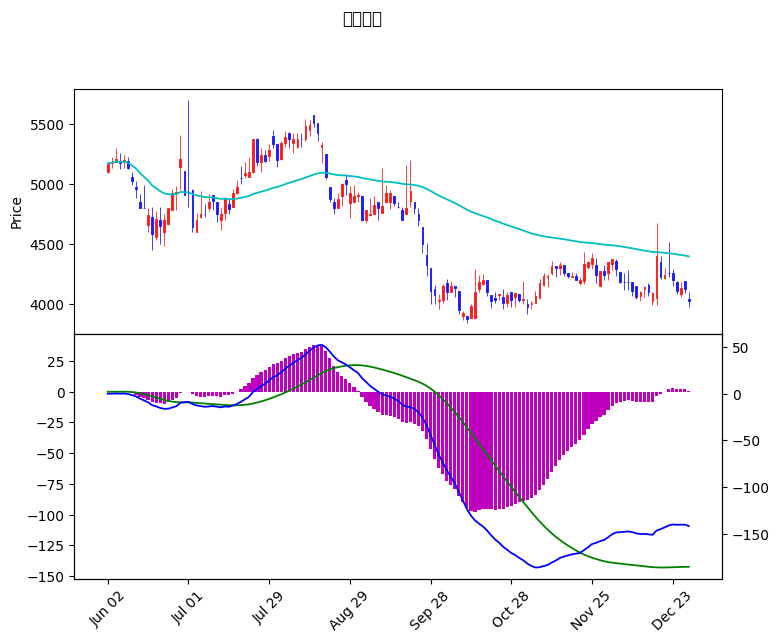

date
2022-06-02    0.000000
2022-06-03    0.021937
2022-06-07    0.141635
2022-06-08   -0.027003
2022-06-09    0.068826
                ...   
2022-12-23    2.819863
2022-12-26    2.373664
2022-12-27    2.411241
2022-12-28    2.356561
2022-12-29    0.845194
Name: close, Length: 145, dtype: float64

In [41]:
price_trend(785)

In [43]:
company_name_list[785]

'브리지텍'

In [25]:
macd_today

[Series([], Name: close, dtype: float64),
 date
 2022-06-02    0.000000
 2022-06-03    0.087749
 2022-06-07   -0.376753
 2022-06-08   -0.013396
 2022-06-09   -0.476988
                 ...   
 2022-12-23    7.369657
 2022-12-26    5.057062
 2022-12-27    4.719476
 2022-12-28    3.517981
 2022-12-29    1.379256
 Name: close, Length: 145, dtype: float64,
 date
 2022-06-02    0.000000
 2022-06-03    0.087749
 2022-06-07   -0.376753
 2022-06-08   -0.013396
 2022-06-09   -0.476988
                 ...   
 2022-12-23    7.369657
 2022-12-26    5.057062
 2022-12-27    4.719476
 2022-12-28    3.517981
 2022-12-29    1.379256
 Name: close, Length: 145, dtype: float64,
 date
 2022-06-02      0.000000
 2022-06-03     -0.043875
 2022-06-07     -0.243965
 2022-06-08     -0.697686
 2022-06-09     -1.443590
                  ...    
 2022-12-23    109.542961
 2022-12-26    100.686824
 2022-12-27     95.854480
 2022-12-28     91.350048
 2022-12-29     82.883807
 Name: close, Length: 145, dtype: float6

In [23]:
len(macd_today[161])

145

In [35]:
last_value

[-1,
 1.379256395827781,
 1.379256395827781,
 82.88380695578417,
 82.88380695578417,
 -109.6720294217713,
 -109.6720294217713,
 -45.184134031333315,
 -45.184134031333315,
 -106.60456788133013,
 -106.60456788133013,
 332.0061045766175,
 332.0061045766175,
 24.467921517275357,
 24.467921517275357,
 -5.429163813750375,
 -5.429163813750375,
 -2268.6416619954125,
 -2268.6416619954125,
 16.656396345807252,
 16.656396345807252,
 -106.39171024050097,
 -106.39171024050097,
 39.28692218051944,
 39.28692218051944,
 17.73960192125429,
 17.73960192125429,
 -1121.1662461886453,
 -1121.1662461886453,
 -178.7070827047953,
 -178.7070827047953,
 -355.84534439834135,
 -355.84534439834135,
 -298.9622994945694,
 -298.9622994945694,
 112.39723295131654,
 112.39723295131654,
 -12.423810734203698,
 -12.423810734203698,
 138.3596334453127,
 138.3596334453127,
 4169.598953543229,
 4169.598953543229,
 103.43657120685691,
 103.43657120685691,
 28.57735041202453,
 28.57735041202453,
 4.230627078598616,
 4.23062707

In [25]:
for i in range(len(company_name_list)):
    if (i == 27) or (i == 118)or (i == 119) or (i == 138) or (i == 139):
        last_value.append(-1)
    else:
        
        last_value.append(macd_today[i][-1])
    print(i)
dd


0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160


IndexError: index -1 is out of bounds for axis 0 with size 0